In [1]:
# Data Structures
import numpy  as np
import pandas as pd
import os
import json

# Corpus Processing
import re
import nltk.corpus

from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud





In [ ]:
!pip install Unidecode 



In [2]:

from unidecode import unidecode


In [3]:
os.getcwd()

'C:\\Users\\meebh\\jupyter\\upwork_text mining'

In [4]:
filelist = os.listdir("dataset")
filelist

['10.1002-adfm.201605307.pdf.txt',
 '10.1002-asia.202100124.pdf.txt',
 '10.1002-celc.201800138.pdf.txt',
 '10.1002-celc.202100783.pdf.txt',
 '10.1002-chem.202100383.pdf.txt',
 '10.1002-cnma.201700016.pdf.txt',
 '10.1002-crat.201200161.pdf.txt',
 '10.1002-er.6618.pdf.txt',
 '10.1002-smll.201603102.pdf.txt',
 '10.1007-s10008-014-2644-3.pdf.txt',
 '10.1007-s10800-019-01341-y.pdf.txt',
 '10.1007-s10853-017-1537-0.pdf.txt',
 '10.1007-s10853-020-04819-9.pdf.txt',
 '10.1007-s10854-018-9592-0.pdf.txt',
 '10.1007-s10854-019-01825-9.pdf.txt',
 '10.1007-s10904-017-0501-4.pdf.txt',
 '10.1007-s10934-021-01083-3.pdf.txt',
 '10.1007-s10948-018-4963-6.pdf.txt',
 '10.1007-s11051-015-2918-4.pdf.txt',
 '10.1007-s11051-019-4614-2.pdf.txt',
 '10.1007-s11581-019-03030-4.pdf.txt',
 '10.1007-s11581-019-03125-y.pdf.txt',
 '10.1007-s11581-020-03508-6.pdf.txt',
 '10.1016-j.actamat.2014.09.055.pdf.txt',
 '10.1016-j.apenergy.2014.11.077.pdf.txt',
 '10.1016-j.apsusc.2016.11.203.pdf.txt',
 '10.1016-j.apsusc.2018.03.

In [ ]:
len(filelist)

In [ ]:
print(filelist[0])

In [5]:
os.chdir("dataset")

In [6]:
data = []
for f in filelist:
    with open(f,'r',encoding='utf8') as myfile:
        string = myfile.read()
        data.append(string)

In [ ]:
len(files)

In [7]:
print(data[0])

www.afm-journal.de

Design of Hierarchical NiCo@NiCo Layered Double 
Hydroxide Core–Shell Structured Nanotube Array for 
High-Performance Flexible All-Solid-State Battery-Type 
Supercapacitors

Yan Liu, Nianqing Fu, Guoge Zhang, Ming Xu, Wei Lu, Limin Zhou, and Haitao Huang*

A novel hierarchical nanotube array (NTA) with a massive layered top and 
discretely separated nanotubes in a core–shell structure, that is, nickel–
cobalt metallic core and nickel–cobalt layered double hydroxide shell 
(NiCo@NiCo LDH), is grown on carbon fiber cloth (CFC) by template-
assisted electrodeposition for high-performance supercapacitor application. 
The synthesized NiCo@NiCo LDH NTAs/CFC shows high capacitance of 
2200 F g−1 at a current density of 5 A g−1, while 98.8% of its initial capacitance 
is retained after 5000 cycles. When the current density is increased from 1 to 
20 A g−1, the capacitance loss is less than 20%, demonstrating excellent rate 
capability. A highly flexible all-solid-stat

In [8]:
df= pd.DataFrame(data,columns=['text'])

In [ ]:
df.shape

In [9]:
df.loc[[10]]['text']

10    Journal of Applied Electrochemistry \nhttps://...
Name: text, dtype: object

In [10]:
corpus= df['text'].tolist()
corpus[10][14:100]

'lied Electrochemistry \nhttps://doi.org/10.1007/s10800-019-01341-y\n\nRESEARCH ARTICLE\n\nO'

In [11]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [12]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
   
    
   
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
      
        
       
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
       
        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [13]:
language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

'nanopart res doi facil synthesi nickel-cobalt doubl hydroxid nanosheet high rate capabl applic supercapacitor minmin wang juni xue fangm zhang wenl hongtao cui receiv novemb accept februari springer science+busi media dordrecht abstract work nickel-cobalt doubl hy- droxid nanosheet high rate capabl prepar facil epoxid precipit rout synthet procedur includ oxid step use ammonium persulf oxid precipit step use propylen oxid precipit agent shown result electr'

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

177 rows


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
cfc,0.558141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ntas,0.460672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ldh,0.297945,0.000000,0.000000,0.010922,0.000000,0.000000,0.000000,0.005036,0.000000,0.366302,...,0.000000,0.000000,0.158865,0.000000,0.00000,0.000000,0.286602,0.0,0.000000,0.000000
figur,0.182481,0.153226,0.133302,0.000000,0.196441,0.165197,0.122488,0.097183,0.215998,0.008242,...,0.096227,0.017404,0.244327,0.032346,0.09416,0.166486,0.052474,0.0,0.071163,0.051618
zno,0.167652,0.000000,0.007623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000


In [15]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
cfc,0.558141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ntas,0.460672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ldh,0.297945,0.000000,0.000000,0.010922,0.000000,0.000000,0.000000,0.005036,0.000000,0.366302,...,0.000000,0.000000,0.158865,0.000000,0.00000,0.000000,0.286602,0.0,0.000000,0.000000
figur,0.182481,0.153226,0.133302,0.000000,0.196441,0.165197,0.122488,0.097183,0.215998,0.008242,...,0.096227,0.017404,0.244327,0.032346,0.09416,0.166486,0.052474,0.0,0.071163,0.051618
zno,0.167652,0.000000,0.007623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000


In [17]:
def run_KMeans(max_k, df):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(df)} )
        
    return kmeans_results

In [18]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df1, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df1, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df1, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df1)
        silhouette_avg = silhouette_score(df1, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df1, n_clusters, kmeans_labels, silhouette_avg)

In [19]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

C:\Users\meebh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\meebh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\meebh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\meebh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\meebh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df1 = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df1)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

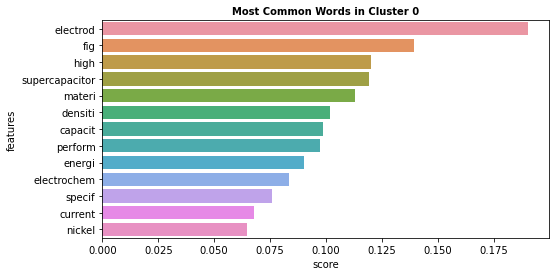

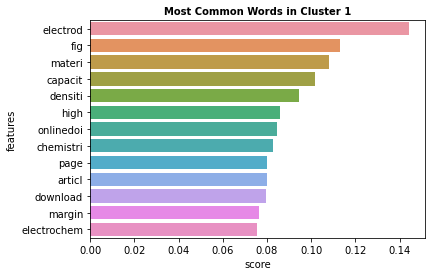

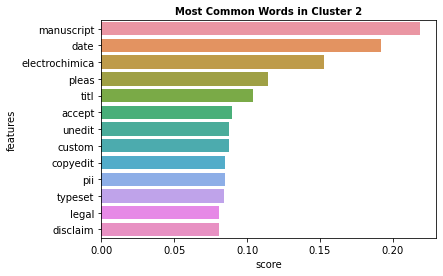

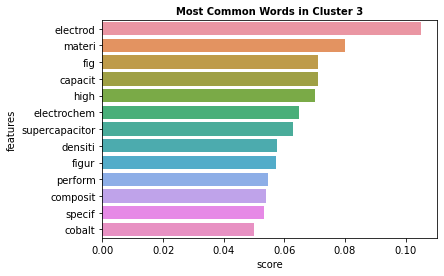

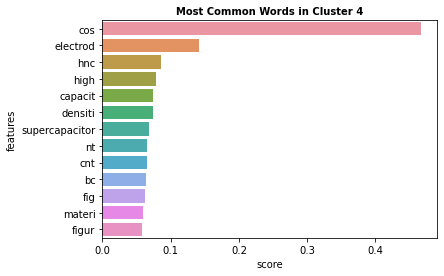

In [21]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [22]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

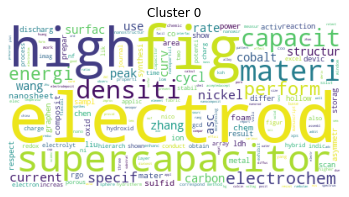

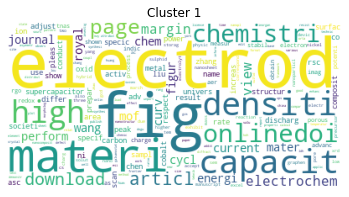

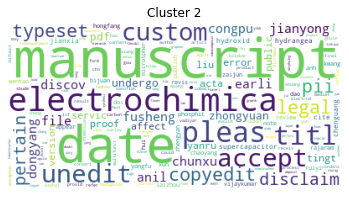

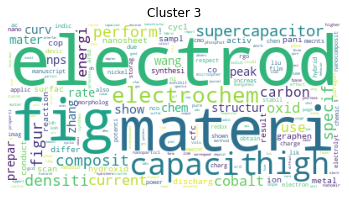

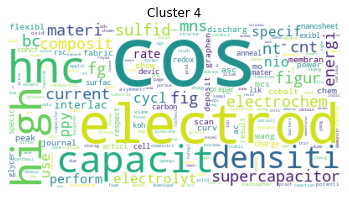

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [25]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,text,label
0,www.afm-journal.de\n\nDesign of Hierarchical N...,3
1,DOI: 10.1002/asia.202100124\n\nFull Paper\n\nE...,0
2,Title: Millimeter-Long Vertically-Aligned Carb...,3
3,Title: Design of oxygen-doped Co3S4 hollow nan...,0
4,Full Paper\ndoi.org/10.1002/chem.202100383\n\n...,3


In [26]:
Feature_extracting_research_dataset= df.to_csv("Feature_extracting_research_dataset.csv",sep=',')